# Assignment 1 - Ei, Manavi, Katie, Omair, and Liz

## 2. Exercises

#### 1. From ARE210, recall (Section 9 in Mahajan’s “Handout 1”) the rule for computing the distribution of certain transformations of random variables (The “inverse Jacobian rule”). Let (x,y) be independently distributed continuous random variables possessing densities fx and fy. Let z = x+y. Use the rule to obtain an expression for the distribution of z.

First, note \begin{align}
    z=x+y \implies x = z - y
\end{align}
The joint density $\{x,y\}$ is $f_{x}$(x)$f_y$(y) = $f_{xy}$(x,y) . Next,
\begin{align}
    F_z(z) = & \int\limits^{\infty}_{-\infty} \int\limits^{\infty}_{-\infty} \textbf I\ (x + y \le z)f_{xy}(x,y)dxdy \\
    & = \int\limits^{\infty}_{-\infty} \int\limits^{z-y}_{-\infty} f_x(x)dxf_y(y)dy  \\
    & = \int\limits^{\infty}_{-\infty} F_x(z-y)f_y(y)dy \\
    f_z(z) &  = \int\limits^{\infty}_{-\infty} f_x(z-y)f_y(y)dy
\end{align}
This is assuming we can interchange differentiation and integration like Aprajit did in the handout.$$

#### 2. We’ve discussed ways to program a convolution of random variables in a Jupiter notebook [ipynb] [datahub]. As in the note- book, consider a discrete random variable s and a continuous random variable x. Prove that the convolution of s and x (or, informally, x + s) has a continuous distribution, as suggested by the figure at the end of the notebook, or establish that the figure is wrong or misleading.

In [1]:
# read package to create idd rvs
from scipy.stats import distributions as iid

# define x and s

x = iid.norm()

Omega = (-1,0,1)
Pr = (1/3.,1/2.,1/6.)

s = iid.rv_discrete(values=(Omega,Pr))

In [7]:
# Code to convolve a random variable with a pmf and another having a cdf
# Exploits =scipy.stats= base rv_continuous class.

class ConvolvedContinuousAndDiscrete(iid.rv_continuous):

    """Convolve (add) a continuous rv x and a discrete rv s,
       returning the resulting cdf."""

    def __init__(self,f,s):
        self.continuous_rv = f
        self.discrete_rv = s
        super(ConvolvedContinuousAndDiscrete, self).__init__(name="ConvolvedContinuousAndDiscrete")
        
    def _cdf(self,z):
        F=0
        s = self.discrete_rv
        x = self.continuous_rv
        
        for k in range(len(s.xk)):
            # convolution part
            F = F + x.cdf(z-s.xk[k])*s.pk[k]
        return F

    def _pdf(self,z):
        f=0
        s = self.discrete_rv
        x = self.continuous_rv
        
        for k in range(len(s.xk)):
            f = f + x.pdf(z-s.xk[k])*s.pk[k]
        return f


# Create new convolved rv:
y = ConvolvedContinuousAndDiscrete(x,s)

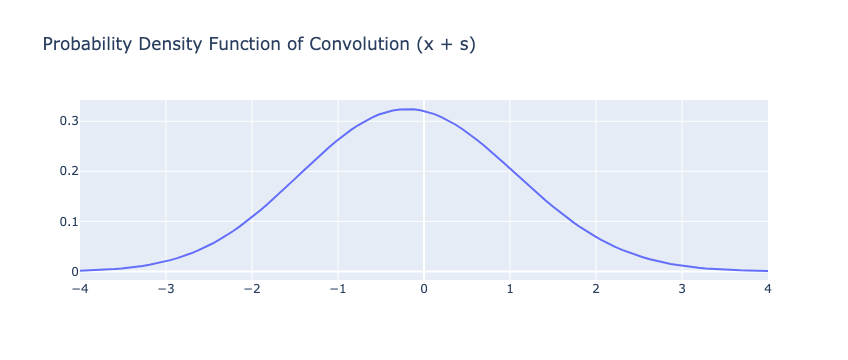

In [10]:
import plotly.graph_objects as go
import numpy as np

# range from -4 to 4 with 100 different possibilities 
X = np.linspace(-4,4,100).tolist()

# make pdf evaluated at each of 100 points
fig = go.Figure(data=go.Scatter(x=X, y=[y.pdf(z) for z in X]))
fig.update_layout(title="Probability Density Function of Convolution (x + s)")
fig.show()

In [11]:
# Evaluate PDF of y at each of 100 points
pdf_y = [y.pdf(z) for z in X]

In [12]:
# Figure does show pdf is continous, also verify pdf is finite
all(np.isfinite(pdf_y))  

True

Given there are no discontinuities over the entire range -4 to 4 and values of the pdf are finite, we can conclude the pdf of the the convolution (x + s) is continuous.

#### 3. Let $A$ be an m×n matrix. A matrix $A^−$ is a generalized inverse of $A$ if $AA^−A = A$. Such a generalized inverse can be shown to always exist. If $A$ is a matrix of zeros, what can we say about $A^-$?

We know that $A^-$ will necessarily have same dimensions as $A$ (m x n) and multiplying it with $A$ will result in a matrix of zeros. 

#### 4. Econometricians spend a great deal of time writing down linear regressions relating an object “Why” to an object “Ex”, but sometimes use quite distinct notations to express this regression. Following our discussion in class, suggest a notation for each of the three following cases:

#### (a) “Why” is a scalar random variable, while “Ex” is a vector random variable;

$$ Y = \beta^T X + u $$

#### (b) “Why” is a single realization of a scalar random variable, while “Ex” is similarly a single realization;

$$ y = \beta^T x + u $$

#### (c) Why” is a vector of N realizations, while “Ex” is similarly a matrix of realizations.

$$ Y = X \beta + u $$

#### 5. Let A be an m×n matrix.

#### (1) If $A$ is a matrix of zeros, what is $A^+$? 

1. $AA^+A = A$ implies that $AA^+$ must be a matrix of zeros because $A$ is a zero matrix, and any matrix multiplied by a zero matrix is a zero matrix.
2. $A^+AA^+ = A^+$ implies that $A^+A$ must be a matrix of zeros.
3. $(AA^+)^T = AA^+$ implies that $AA^+$ is symmetric. Since $AA^+$ is a zero matrix, it is symmetric.
4. $(A^+A)^T = A^+A$ implies that $A^+A$ is symmetric. Since $A^+A$ is a zero matrix, it is symmetric.

Given these Moore-Penrose inverse properties, $A^+$ must be a matrix of zeros.

#### (2) Show that if X has full column rank, then $X^+ = (X^TX)^{-1}X^T$ (this is sometimes called the “left inverse), and $X^+X = I$.

Proof that $X^+ = (X^TX)^{-1}X^T$:

Since $X$ has full column rank, $X^TX$ is positive definite and is invertible. 
We will show that if $(X^TX)^{-1}X^T$ satisfies the Moore-Penrose Inverse properties, then $X^+ = (X^TX)^{-1}X^T$.

Let $ Y = (X^TX)^{-1}X^T $. Observe below that $Y$ satisfies the following 4 properties.

1. $XYX = X$
\begin{align}
     XYX = X(X^TX)^{-1}X^TX = XIX = X
\end{align}

2. $YXY = Y$
\begin{align}
     YXY & = (X^TX)^{-1}X^TX(X^TX)^{-1}X^T \\
   & = (X^TX)^{-1}(X^TX)(X^TX)^{-1}X^T \\
   & = (X^TX)^{-1}X^T = Y
\end{align}

3. $(XY)^T = XY$
\begin{align}
     (XY)^T & = (X(X^TX)^{-1}X^T)^T \\
   & = (X^T)^T((X^TX)^{-1})^TX^T \\
   & = X(X^TX)^{-T}X^T \\
   & = X(X^TX)^{-1}X^T \text{ (because $X^TX$ is symmetric)} \\
   & = XY
\end{align}

5. $(YX)^T = YX$
\begin{align}
     (YX)^T &= ((X^TX)^{-1}X^TX)^T \\
   & = X^T(X^T)^T((X^TX)^{-1})^T \\
   & = X^TX(X^TX)^{-1} \\
   & = (X^TX)^{-1}X^TX \\
   & = YX
\end{align}

Proof that $X^+X = I$:
\begin{align}
     X^+X & = [(X^TX)^{-1}X^T]X \\
     & = (X^TX)^{-1}(X^TX) \\
     & = I
\end{align}

#### (3) Use the result of (2) to solve for $b$ in the (matrix) form of the regression $y = Xb+u$ if $X^⊤u = 0$.

\begin{align}
    y & = Xb + u \\
    X^Ty & = X^TXb + X^Tu \\
    X^Ty & = X^TXb \text{ (because $X^Tu$ = 0)} \\
    (X^TX)^{-1}X^Ty & = (X^TX)^{-1}X^TXb \\
    (X^TX)^{-1}X^Ty & = Ib \\
    \implies b & = (X^TX)^{-1}X^Ty
\end{align}

## 3. Convolutions

#### (1) As in the notebook, consider a discrete random variable s and a continuous random variable x. Prove that the convolution of s and x (or, informally, x + s) has a continuous distribution, as suggested by the figure at the end of the notebook, or establish that the figure is wrong or misleading.

See exercise 2.2 

#### (2) The notebook develops a simple class ConvolvedContinuousAndDiscrete to allow for the creation and manipulations of (you guessed it) convolutions of a continuous rv with a discrete rv. Can you develop a similar class for convolutions of independent discrete random variables?

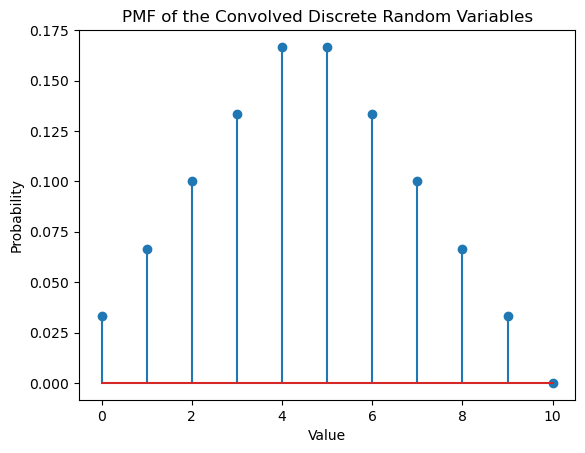

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete

class ConvolvedDiscreteDiscrete:

    def __init__(self, rv1, rv2):
        self.rv1 = rv1
        self.rv2 = rv2

    def pmf(self, z):
        pmf = 0
        for k in self.rv1.xk:
            for l in self.rv2.xk:
                if k + l == z:
                    pmf += self.rv1.pmf(k) * self.rv2.pmf(l)
        return pmf

    def plot_pmf(self, support_range):
        pmf_values = [self.pmf(z) for z in support_range]
        plt.stem(support_range, pmf_values)
        plt.title('PMF of the Convolved Discrete Random Variables')
        plt.xlabel('Value')
        plt.ylabel('Probability')
        plt.show()

# Define two discrete random variables
values1 = np.arange(0, 5)  # Possible values for rv1
probabilities1 = np.full(5, 1/5)  # Uniform distribution for rv1

values2 = np.arange(0, 6)  # Possible values for rv2
probabilities2 = np.full(6, 1/6)  # Uniform distribution for rv2

rv1 = rv_discrete(name='rv1', values=(values1, probabilities1))
rv2 = rv_discrete(name='rv2', values=(values2, probabilities2))

convolved_rv = ConvolvedDiscreteDiscrete(rv1, rv2)
convolved_rv.plot_pmf(range(0, 11))

#### (3) Same as (2), but convolutions of independent continuous random variables? 

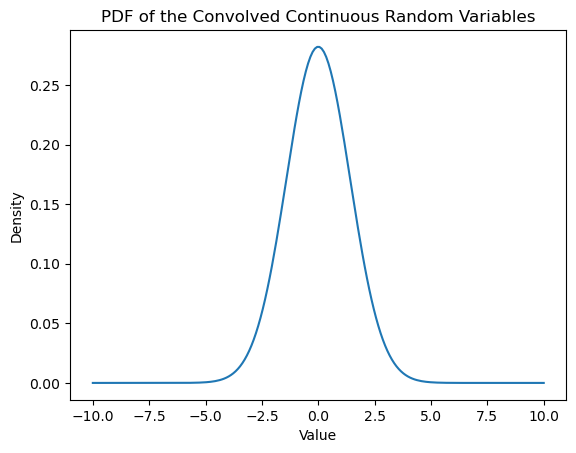

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

class ConvolvedContinuousContinuous:

    def __init__(self, rv1, rv2):
        self.rv1 = rv1
        self.rv2 = rv2

    def pdf(self, z):
        # Calculate the PDF of the convolution at point z
        def integrand(x):
            return self.rv1.pdf(x) * self.rv2.pdf(z - x)

        return quad(integrand, -np.inf, np.inf)[0]

    def plot_pdf(self, support_range):
        pdf_values = [self.pdf(z) for z in support_range]
        plt.plot(support_range, pdf_values)
        plt.title('PDF of the Convolved Continuous Random Variables')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.show()

# Define two continuous random variables
rv1 = norm(loc=0, scale=1)  # Standard normal distribution
rv2 = norm(loc=0, scale=1)  # Standard normal distribution

convolved_rv = ConvolvedContinuousContinuous(rv1, rv2)
support_range = np.linspace(-10, 10, 200)
convolved_rv.plot_pdf(support_range)

## 4. General Weighted Linear Regressions

####  List the main regression estimators you encountered in the first half of the class. For each estimator, establish whether it belongs to the class of general weighted linear regressions $$ T'Y = T'X \beta  + T'u $$ For the estimator you’ve listed, if it is a general weighted linear regression then what is the form of $T$? Is $T$ random? If the estimator is not in this class, show why.

##### Main regression estimators
OLS,
GLS,
FGLS,
MLE,
2SLS,
IV

OLS - Yes, OLS is a class of general weighted linear regressions. T would be the identity matrix. However,  since the identity matrix doesn't actually transform the data, some may not consider OLS to be a true general weighted linear regression. OLS assumes homoscedasticity and no autocorrelation in the errors, which does not require any weighting or transformation of the error structure.

GLS - Yes, GLS is a class of general weighted linear regressions. T is not random, but it is also not necessarily unique. If the expected squared error given X equals (sigma)^2 * matrix omega(X),  then T is such that omega inverse = T * T' .

FGLS - Yes, FGLS is a class og general weighted linear regressions. T is not random, but it is constructed from the matrix omega(X) which we consider to be a random variable.
    
MLE - Yes, MLE is a class of general weighted linear regressions. T is the identity matrix. However, as with OLS, some may not consider it to be a true general weighted linear regression model when applied to the linear regression model. In this scenario, MLE can coincide with OLS under the assumption of normally distributed errors. It does not inherently use a transformation matrix $T$, so T would be the identity matrix. However, when MLE is used in conjunction with models that assume heteroskedasticity or other structures on the variance-covariance matrix, it could be considered more of a typical general weighted linear regression.

2SLS - Yes, 2SLS is a class of general weighted linear regressions. T would be the identity matrix. However, as with OLS, some may not consider this to be a true general weighted linear regression. 2SLS does not require the weighting of observations with a matrix $T$; it substitutes the endogenous variables with their predicted values from the first stage regression. T would have to be the identity matrix, so it wouldn't truly transform the data.

IV - Yes, IV is a class of general weighted linear regressions. T would be the identity matrix. However, as with OLS, IV does not typically require the transformation of the error structure or apply weights to observations, so it would be reasonable to not consider this a true general weighted linear regression since the identity matrix doesn't really transform the data.

## 5. Simultaneous Equations

#### When we defined the general weighted regression, we didn’t assume anything about the dimension of the different objects except that they were `conformable.’ So: consider $$ y = X \beta + u \text{ with } ET'u = 0, $$ where $ y = [y_1, y_2, ..., y_k] $, so that if you had a sample of N observations realizations of y would be an N x k matrix.

#### (1) What does our assumption of conformability then imply about the dimensions of X, β, T, and u?

y = Xβ + u, with ET'u = 0

Define r = the number of regressors including intercept

y is N x k (given)

X is N x r

β is r x k

T is N x N

u is N x k

#### (2) Could you use the estimator we developed in weighted_regression.ipynb to estimate this system of simultaneous equations?

Yes, we could use it to estimate this system of simultaneous equations. The system of simultaneous equations has all the necessary elements.

#### (3) Extend the code in weighted_regression.ipynb to actually estimate β in the case with k = 3.

In [13]:
# code adapted from weighted_regression.ipynb
import numpy as np
from scipy.stats import multivariate_normal

k = 3 
mu = [0]*k
Sigma=[[1,0.5,0],
       [0.5,2,0],
       [0,0,3]]
# define our random variables 
T_rv = multivariate_normal(mu,Sigma)
u_rv = multivariate_normal(cov=0.2)

# Construct sample
beta = [1/2,1, 2]
D = np.random.random(size=(3,3)) # Generate random lxK matrix, where k = 3
N=1000 # Sample size
# Sample from our random variables
T = T_rv.rvs(N)
u = u_rv.rvs(N)

X = (T**3)@D  
y = X@beta + u 

# Compute numerical solution
from scipy.linalg import inv, sqrtm
b = np.linalg.lstsq(T.T@X,T.T@y,rcond=None)[0] # lstsq returns several results
e = y - X@b

print("Our coefficient estimates are:")
print(b)

TXplus = np.linalg.pinv(T.T@X) # Moore-Penrose pseudo-inverse
# Covariance matrix of b
vb = e.var()*TXplus@T.T@T@TXplus.T  # u is known to be homoskedastic

print("Covariance matrix:")
print(vb)

Our coefficient estimates are:
[0.50360657 1.0091714  1.9924179 ]
Covariance matrix:
[[ 1.89057335e-05 -5.20520647e-05  3.23001332e-05]
 [-5.20520647e-05  3.62038164e-04 -2.32253202e-04]
 [ 3.23001332e-05 -2.32253202e-04  1.50558259e-04]]


#### (4) What additional assumptions are necessary to estimate the distribution of the estimator of beta?

1. Linearity: The relationship between the independent variables and the dependent variable is linear. This is a key feature of the linear regression model.
2. Independence: The observations are independent of each other. This means the error term of one observation is not correlated with the error term of another observation.
3. Homoscedasticity: The variance of the error terms is constant across all levels of the independent variables (X). If the variance changes (heteroscedasticity), it can affect the efficiency of the estimator.
4. Normality: The error terms (u) are normally distributed. This assumption is crucial when the sample size is small, as it allows us to make inferences about β using the t-distribution or z-distribution.
5. No multicollinearity: The independent variables are not perfectly collinear, meaning that no independent variable is a perfect linear function of other independent variables.

## 6. SUR

#### (1) Picking up from the discussion of simultaneous equations above, where y is N × k, and (3) y = Xβ + u. If X is N × l and cov(u|X) = Ω then this is a generalization of the assumption of homoskedasticity to a multivariate setting; the resulting structure is called a system of “Seemingly Unrelated Regressions” (SUR).

(1) The covariance matrix, Ω, shows the relationshp between error terms across regressions. If the covariance between two error terms (u1 and u2) is non-zero, then  observing a realization of y1 may impact the prediction of y2. The non-zero covariance suggests there are common variables included in the u of both models.

####  (2) Adapt the code in weighted_regression.ipynb so that the data- generating process for u can accommodate a general covariance matrix such as Ω, and let X = T. Estimate β.

In [14]:
# (2) Code adapted from weighted_regression.ipynb 

from scipy.stats import multivariate_normal
from scipy.linalg import inv, sqrtm
import numpy as np


# Define variables 
k = 3 # Number of observables in T

mu = [0]*k
Sigma=[[1,0.5,0],
       [0.5,2,0],
       [0,0,3]]

Omega=[[0.2,0.05,-0.1],
       [0.05,0.2,0],
       [-0.1,0,0.2]]    

T_rv = multivariate_normal(mu,Sigma)
u_rv = multivariate_normal(mu, Omega) 

beta = [1/2,1, 2]
beta = np.array(beta).reshape(-1, 1) # Maybe reshape?

N=1000 # Sample size

# Transform random variables into a sample
T = T_rv.rvs(N)
u = u_rv.rvs(N) 
X = T  
y = X@beta + u # @ operator for matrix multiplication


# Solve numerically 
b = np.linalg.lstsq(T.T@X,T.T@y,rcond=None)[0] # lstsq returns several results

e = y - X@b

print(b)

TXplus = np.linalg.pinv(T.T@X) # Moore-Penrose pseudo-inverse

# UPDATE THIS - Covariance matrix of b
vb = e.var()*TXplus@T.T@T@TXplus.T 

print(vb)

[[0.51029176 0.51089529 0.48814952]
 [0.99399596 0.97930396 1.01803823]
 [1.99743185 2.00218822 2.01780648]]
[[ 2.11482053e-04 -5.38487691e-05  1.66700251e-06]
 [-5.38487691e-05  1.10721648e-04 -3.44725711e-06]
 [ 1.66700251e-06 -3.44725711e-06  6.76764039e-05]]


#### (3) How are the estimates obtained from this SUR system different from what one would obtain if one estimated equation by equation using OLS?

When the regressors are common across equations $x_{ji}$ = $x_{i}$, the SUR estimator in fact simplifies to least-squares.